In [ ]:


# Building deep learning models
import tensorflow as tf 
from tensorflow import keras 
# For accessing pre-trained models
import tensorflow_hub as hub 
# For separating train and test sets
from sklearn.model_selection import train_test_split

# For visualizations
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2
from PIL import Image

import os
import numpy as np
import pathlib

In [ ]:
# !unzip "/content/drive/MyDrive/FARM_ROBO/archive (7).zip" -d "/content/drive/MyDrive/FARM_ROBO"

Archive:  /content/drive/MyDrive/FARM_ROBO/archive (7).zip
replace /content/drive/MyDrive/FARM_ROBO/PlantVillage/Pepper__bell___Bacterial_spot/0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# !cp '/content/drive/MyDrive/FARM_ROBO/PlantVillage/Potato___Early_blight' -r '/content/drive/MyDrive/FARM_ROBO/Potato'
# !cp '/content/drive/MyDrive/FARM_ROBO/PlantVillage/Potato___Late_blight' -r '/content/drive/MyDrive/FARM_ROBO/Potato'
# !cp '/content/drive/MyDrive/FARM_ROBO/PlantVillage/Potato___healthy' -r '/content/drive/MyDrive/FARM_ROBO/Potato'

In [ ]:
data_dir = "/content/drive/MyDrive/FARM_ROBO/Potato" # Datasets path
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/drive/MyDrive/FARM_ROBO/Potato')

In [ ]:
early_blight = list(data_dir.glob('Potato___Early_blight/*'))[:300]
late_blight = list(data_dir.glob('Potato___Late_blight/*'))[:300]
healthy = list(data_dir.glob('Potato___healthy/*'))[:300]

In [ ]:
df_images = {
    #'bacterial_spot': bacterial_spot,
    'early_blight': early_blight,
    'late_blight': late_blight,
    #'leaf_mold': leaf_mold,
    #'septoria_leaf_spot': septoria_leaf_spot,
    #'spider_mites_two_spotted_spider_mites': spider_mites_two_spotted_spider_mites,
    #'target_spot' : target_spot,
    #'tomato_yellow_leaf_curl_virus': tomato_yellow_leaf_curl_virus,
    #'tomato_mosaic_virus' : tomato_mosaic_virus,
    'healthy': healthy
}

# Contains numerical labels for the two categories
df_labels = {
    #'bacterial_spot': 0,
    'early_blight': 0,
    'late_blight': 1,
    #'leaf_mold': 3,
    #'septoria_leaf_spot': 4,
    #'spider_mites_two_spotted_spider_mites': 5,
    #'target_spot' : 6,
    #'tomato_yellow_leaf_curl_virus': 7,
    #'tomato_mosaic_virus' : 8,
    'healthy': 2
}

In [ ]:
X, y = [], [] # X = images, y = labels

for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224)) # Resizing the images to be able to pass on MobileNetv2 model
        X.append(resized_img) 
        y.append(df_labels[label])

In [ ]:
# Standarizing
X = np.array(X)
y = np.array(y)
X = X/255

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
mobile_net = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4' # MobileNetv2 link
mobile_net = hub.KerasLayer(
        mobile_net, input_shape=(224,224, 3), trainable=False) # Removing the last layer

In [ ]:
num_label = 3 # number of labels

model = keras.Sequential([
    mobile_net,
    keras.layers.Dense(num_label)
])

model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])


history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
18/18 [==============================] - 23s 1s/step - loss: 0.9138 - acc: 0.5922
Epoch 2/20
18/18 [==============================] - 18s 1s/step - loss: 0.4091 - acc: 0.8865
Epoch 3/20
18/18 [==============================] - 22s 1s/step - loss: 0.2876 - acc: 0.9184
Epoch 4/20
18/18 [==============================] - 18s 1s/step - loss: 0.2284 - acc: 0.9344
Epoch 5/20
18/18 [==============================] - 18s 1s/step - loss: 0.1970 - acc: 0.9415
Epoch 6/20
18/18 [==============================] - 20s 1s/step - loss: 0.1735 - acc: 0.9557
Epoch 7/20
18/18 [==============================] - 18s 1s/step - loss: 0.1581 - acc: 0.9521
Epoch 8/20
18/18 [==============================] - 18s 1s/step - loss: 0.1383 - acc: 0.9610
Epoch 9/20
18/18 [==============================] - 20s 1s/step - loss: 0.1228 - acc: 0.9699
Epoch 10/20
18/18 [==============================] - 18s 1s/step - loss: 0.1136 - acc: 0.9681
Epoch 11/20
18/18 [==============================] - 18s 1s/step - lo

In [ ]:
model.evaluate(X_test,y_test)

6/6 [==============================] - 8s 1s/step - loss: 0.1317 - acc: 0.9521


[0.13167284429073334, 0.9521276354789734]

In [ ]:
from sklearn.metrics import classification_report


y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

3/3 [==============================] - 7s 2s/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        83
           1       0.96      0.93      0.94        69
           2       0.85      0.92      0.88        36

    accuracy                           0.95       188
   macro avg       0.93      0.94      0.94       188
weighted avg       0.95      0.95      0.95       188



In [ ]:
import time
t = time.time()

export_path = "/content/drive/MyDrive/FARM_ROBO/plant-tf-model"
model.save(export_path)

export_path

'/content/drive/MyDrive/FARM_ROBO/plant-tf-model'

In [ ]:
reloaded = tf.keras.models.load_model(export_path)

In [ ]:
import cv2
img = cv2.imread("/content/drive/MyDrive/FARM_ROBO/Potato/Potato___Late_blight/006cc01a-1888-4326-9b62-a65cb55a6377___RS_LB 5207.JPG")

resized_img = cv2.resize(img, (224, 224)) # Resizing the images to be able to pass on MobileNetv2 model
resized_img = resized_img/255
print(resized_img.shape)
resized_img = resized_img.reshape(1,224,224,3)
print(resized_img.shape)
result_batch = model.predict(resized_img)
print(result_batch)
import numpy as np 
print(np.argmax(result_batch))
if np.max(result_batch) > 0:
  if np.argmax(result_batch) == 0:
    # This comes on the first model
    # corn_model.predict(resized_image)
    print("Early blight")q
  elif np.argmax(result_batch) == 1:
    # This comes on the first model
    # tomato_model.predict(resized_image)
    print("Late blight")
  elif np.argmax(result_batch) == 2:
    # This comes on the first model
    # potato_model.predict(resized_image)
    print("Healthy")
else:
  print("not found")  

# reloaded_result_batch = reloaded.predict(image_batch)

(224, 224, 3)
(1, 224, 224, 3)
1/1 [==============================] - 0s 67ms/step
[[-1.2254523  3.3726723 -2.9642687]]
1
Late blight


In [ ]:
# Converting a SavedModel to a TensorFlow Lite model.
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_saved_model('/content/drive/MyDrive/FARM_ROBO/plant-tf-model')
tflite_model = converter.convert()

In [ ]:
#if you want to save the TF Lite model use below steps or else skip
import pathlib
tflite_model_files = pathlib.Path('/content/plant-tf-model.tflite')
tflite_model_files.write_bytes(tflite_model)

8880212

In [ ]:
import tensorflow as tf

print(tf.__version__)

2.11.0


In [ ]:
import pathlib
tflite_model_files = pathlib.Path('/content/drive/MyDrive/FARM_ROBO/plant-tf-model.tflite')

In [ ]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

NameError: ignored

In [ ]:
import cv2
img = cv2.imread("/content/ooooooooooooooooo.jpg")
import numpy as np

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
def detect_leaf(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask_brown = cv2.inRange(hsv, (8, 60, 20), (30, 255, 200))
    mask_yellow_green = cv2.inRange(hsv, (10, 39, 64), (86, 255, 255))
    mask = cv2.bitwise_or(mask_yellow_green, mask_brown)
    res = cv2.bitwise_and(img, img, mask=mask)
    print(res)
    if np.count_nonzero(res) == 0:
      print("000000")
    else: 
      print("Not 0")



    

In [ ]:
detect_leaf(img)

In [ ]:
import numpy as np

# create an example array
arr = np.array([0, 0, 0, 0])

# check if the array is full of zeros
if np.count_nonzero(arr) == 0:
    print("The array is full of zeros.")
else:
    print("The array is not full of zeros.")

The array is full of zeros.


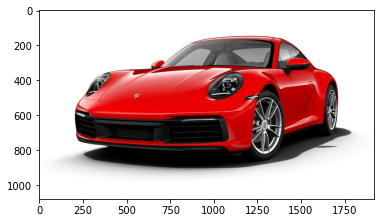

[]
yes


In [ ]:
from skimage import io, color, filters, feature
from skimage.morphology import disk, binary_erosion
from skimage.measure import label, regionprops
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = io.imread('/content/ooooooooooooooooo.jpg')

# Convert the image to grayscale
gray = color.rgb2gray(image)

# Apply a Gaussian filter to smooth the image
smoothed = filters.gaussian(gray, sigma=3)

# Apply Canny edge detection to find the edges
edges = feature.canny(smoothed, sigma=2)

# Apply binary erosion to separate the edges
selem = disk(3)
eroded = binary_erosion(edges, selem)

# Label the connected regions in the binary image
label_img = label(eroded)

# Find the regions that have properties of a leaf
leaf_regions = []
for region in regionprops(label_img):
  if region.area > 1000 and region.area < 20000 and region.major_axis_length / region.minor_axis_length > 2:
    leaf_regions.append(region)

# Plot the original image with the detected regions
fig, ax = plt.subplots()
ax.imshow(image)
for region in leaf_regions:
    minr, minc, maxr, maxc = region.bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
plt.show()
print(leaf_regions)
# Determine if there is a leaf in the image or not
if len(leaf_regions) > 0:
    print('no.')
else:
    print('yes')

In [ ]:
image = io.imread('/content/download.png')

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np

# Load the pre-trained ResNet50 model
model = tf.keras.applications.ResNet50(include_top=True, weights='imagenet')

# Load the image
img = tf.keras.utils.load_img('/content/ooooooooooooooooo.jpg', target_size=(224, 224))

# Preprocess the image
x = tf.keras.utils.img_to_array(img)
x = preprocess_input(x)
x = np.expand_dims(x, axis=0)

# Make a prediction
preds = model.predict(x)
pred_class = decode_predictions(preds, top=1)[0][0][1]
pred_prob = decode_predictions(preds, top=1)[0][0][2]
print(pred_prob)
# Check if the predicted class is a leaf or not
if pred_prob <= 0.5:
    print("The image is a leaf.")
else:
    print("The image is not a leaf.")

1/1 [==============================] - 1s 1s/step
0.7875332
The image is not a leaf.


In [ ]:
detect_leaf(image)

error: ignored

In [ ]:
# Determine if there is a leaf in the image or not
if len(leaf_regions) > 0:
    print('no.')
else:
    print('yes')

yes


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np

# Load the pre-trained ResNet50 model
model = tf.keras.applications.ResNet50(include_top=True, weights='imagenet')

# Load the image
img = tf.keras.utils.load_img('/content/pexels-photo-2559931.jpeg', target_size=(224, 224))

# Preprocess the image
x = tf.keras.utils.img_to_array(img)
x = preprocess_input(x)
x = np.expand_dims(x, axis=0)

# Make a prediction
preds = model.predict(x)
pred_class = decode_predictions(preds, top=1)[0][0][1]
pred_prob = decode_predictions(preds, top=1)[0][0][2]
print(pred_prob)
# Check if the predicted class is a leaf or not
if pred_prob <= 0.5:
    print("The image is a leaf.")
else:
    print("The image is not a leaf.")

1/1 [==============================] - 2s 2s/step
0.17700846
The image is a leaf.


In [ ]:
import time
t = time.time()

export_path = "/content/leaf_detection"
model.save(export_path)

export_path

'/content/leaf_detection'

In [ ]:
# Converting a SavedModel to a TensorFlow Lite model.
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_saved_model('/content/leaf_detection')
tflite_model = converter.convert()

In [ ]:
#if you want to save the TF Lite model use below steps or else skip
import pathlib
tflite_model_files = pathlib.Path('/content/leaf_detection.tflite')
tflite_model_files.write_bytes(tflite_model)

102157452

In [ ]:
!cp '/content/leaf_detection' -r '/content/drive/MyDrive/FARM_ROBO'
!cp '/content/leaf_detection.tflite' -r '/content/drive/MyDrive/FARM_ROBO'
